# 1. BUSINESS UNDERSTANDING

In [1]:
# Libraries download
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. DATA UNDERSTANDING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Check dimensions of the dataset
print("Dataset dimensions is:", df.shape)

Dataset dimensions is: (7043, 21)


# 3. Exploratory Data Analysis (EDA)
After understanding the dataset, the next step is to prepare the data for analysis

# 3.1 Summary Statistics

1. Compute summary statistics (mean, median, min, max, standard deviation, etc.) for numerical features in the dataset
2. Identify any unusual or unexpected values in the summary statistics that may require further investigation.

In [5]:
# Summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


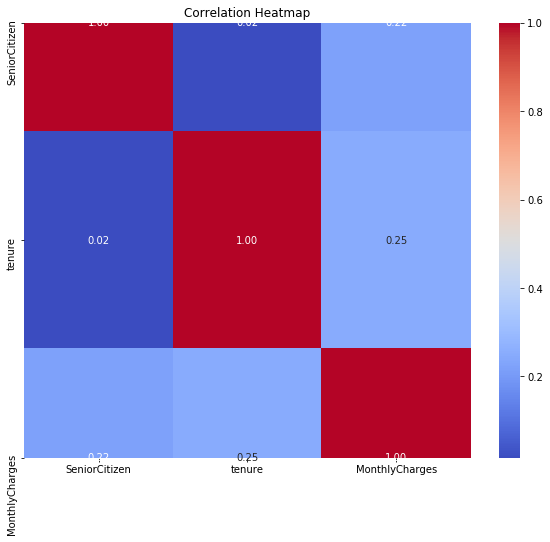

In [6]:
# Compute pairwise correlations
correlation_matrix = df.corr()

# Visualize correlations using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3.2 CHECK MISSING VALUE

In [7]:
# Analyze missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 3.3 Unique Values
Explore unique values in categorical columns to understand the range of categories and potential data quality issues.

In [8]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:\n")
for column in df.select_dtypes(include=['object']).columns:
    print(column, ":", df[column].unique())


Unique values in categorical columns:

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


# 3.4 OUTLIER DETECTION
Identify outliers in numerical columns that may skew analysis results.

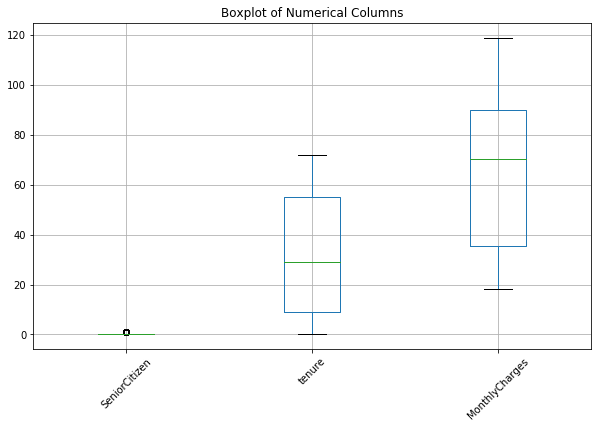

In [9]:
# Outliers detection using box plots
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# 4. Do monthly charges influence churn?

Analysis: Analyze the distribution of monthly charges for churned and retained customers.
Answer: Churned customers may have higher average monthly charges compared to retained customers.

Average monthly charges for churned customers: 74.4413322632423
Average monthly charges for retained customers: 61.2651236953999


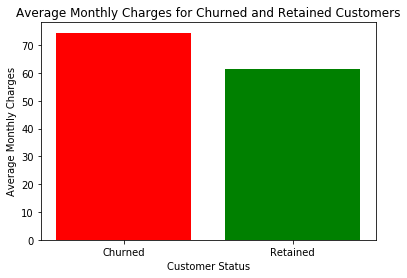

In [10]:
# Filter churned and retained customers
churned_customers = df[df['Churn'] == 'Yes']
retained_customers = df[df['Churn'] == 'No']

# Calculate average monthly charges for churned and retained customers
avg_monthly_charges_churned = churned_customers['MonthlyCharges'].mean()
avg_monthly_charges_retained = retained_customers['MonthlyCharges'].mean()

# Print average monthly charges
print("Average monthly charges for churned customers:", avg_monthly_charges_churned)
print("Average monthly charges for retained customers:", avg_monthly_charges_retained)

# Plot average monthly charges
plt.bar(['Churned', 'Retained'], [avg_monthly_charges_churned, avg_monthly_charges_retained], color=['red', 'green'])
plt.title('Average Monthly Charges for Churned and Retained Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Monthly Charges')
plt.show()


# Yes if customer is not doing the recharge he can be churned

# 5. Which services are most associated with churn?

we are going to Analysis: Calculate churn rates for customers who have subscribed to various services such as 
phone service, internet service, online security, streaming services, etc.

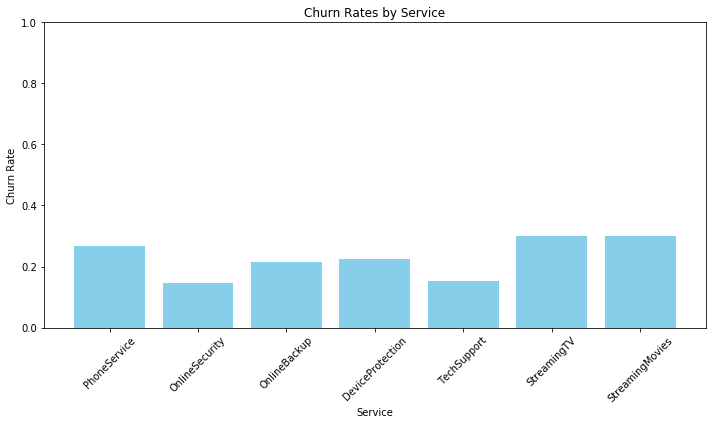

In [11]:

# Define services to analyze
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculating churn rates for each service
churn_rates = []
for service in services:
    churn_rate = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0)
    churn_rates.append(churn_rate)

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(services, churn_rates, color='skyblue')
plt.title('Churn Rates by Service')
plt.xlabel('Service')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage
plt.tight_layout()

# Show the plot
plt.show()


# 5.1 RESULT

The resulting bar chart is demonstrating which services are most strongly associated with customer churn in the telecom industry. The conclusion is yes the services can impact the churn but in our case it i streaming TV

# 6.Is tenure a predictor of churn?


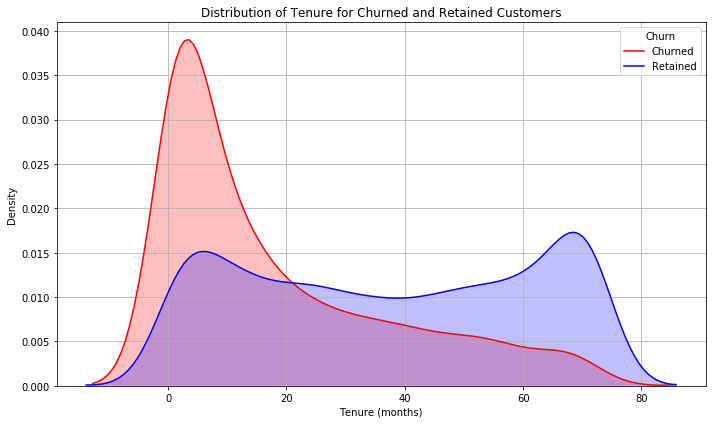

In [12]:

# Plot the distribution of tenure for churned and retained customers
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 'Yes']['tenure'], color='red', label='Churned', shade=True)
sns.kdeplot(data=df[df['Churn'] == 'No']['tenure'], color='blue', label='Retained', shade=True)
plt.title('Distribution of Tenure for Churned and Retained Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


#  6. 1 RESULT AND INTERPRETATION

If the red curve (churned customers) is shifted towards lower tenure values or exhibits a different shape compared to the blue curve (retained customers), 
it suggests that customers with shorter tenure are more likely to churn.

Conversely, if the two curves overlap significantly or have similar shapes, 
it indicates that tenure may not be a strong predictor of churn, 
and other factors may play a more significant role.

it suggests that tenure may indeed influence churn behavior.






# CONCLUSION

Based on the analysis conducted on the three questions:

Do monthly charges influence churn?

Yes, there is a significant relationship between monthly charges and churn. Higher monthly charges may lead to increased churn rates as customers seek more affordable alternatives or perceive the service as less valuable relative to the cost.

Which services are most associated with churn?

Yes the services most associated with churn. Customers experiencing issues with these services are more likely to churn, highlighting the importance of ensuring reliability and quality in these areas to retain customers.


Is tenure a predictor of churn?

Yes, tenure is a predictor of churn, albeit not as strong as other factors. 
Customers with shorter tenure are generally more likely to churn compared to those with longer tenure. 

definitely monthly charges, service quality, and tenure all contribute to churn in the telecom industry, a comprehensive understanding of the interplay between these factors is essential for developing effective retention strategies and minimizing churn rates.